# Final sumbmission


---



## Predicting if a song will be popular in Europe. 🎶🎧
[kaggle dataset](https://www.kaggle.com/datasets/asaniczka/top-spotify-songs-in-73-countries-daily-updated)    


---

Shani Finkelstein 326043247 & Ofek Kirshenboim 209224880

### This notebook covers:
- [Data overview](#scrollTo=iOWoaMefBw82&line=1&uniqifier=1)
- [Data cleaning](#scrollTo=e3apeqEzx-D8&line=1&uniqifier=1)
- [Exploratory data analysis](#scrollTo=mFCd_O5KW9sQ)
- [Model](#scrollTo=WDtdEsveBjoC)
- [Analyzing Model Performance with SHAP](#scrollTo=40lXLuue4HcX)
-[Summary](#scrollTo=VcnXDWLjBUWS&line=1&uniqifier=1)

By given a new song paramaters; ['artist', 'daily_movement','weekly_movement', 'album_name', 'month_of_album_release_date','year_of_album_release_date']   
The model will decide if the song will succeed more or less in Europe (1 and 0 respectively).

In [213]:
!pip install -r /content/reqirements.txt

# Data overview

In [214]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [215]:
import pandas as pd

# Load the dataset
file_path= "/content/drive/MyDrive/universal_top_spotify_songs.csv"
df= pd.read_csv(file_path)
df.head()

,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,0R6NfOiLzLj4O5VbYSJAjf,La Diabla,Xavi,1,0,1,NaN,2024-01-25,98,False,...,11,-4.372,0,0.0409,0.2550,0.000000,0.2360,0.697,131.842,3
1,7gaA3wERFkFkgivjwbSvkG,"yes, and?",Ariana Grande,2,0,-1,NaN,2024-01-25,96,True,...,1,-6.513,1,0.0505,0.1980,0.000085,0.1040,0.823,119.008,4
2,3rUGC1vUpkDG9CZFHMur1t,greedy,Tate McRae,3,0,0,NaN,2024-01-25,100,True,...,6,-3.180,0,0.0319,0.2560,0.000000,0.1140,0.844,111.018,1
3,4xhsWYTOGcal8zt0J161CU,Lovin On Me,Jack Harlow,4,0,1,NaN,2024-01-25,99,True,...,2,-4.911,1,0.0568,0.0026,0.000002,0.0937,0.606,104.983,4
4,3vkCueOmm7xQDoJ17W1Pm3,My Love Mine All Mine,Mitski,5,1,-1,NaN,2024-01-25,99,False,...,9,-14.958,1,0.0321,0.8680,0.135000,0.1580,0.121,113.950,4


This dataset presents the top songs currently trending for over 73 countries.

Top 50 songs for each country is updated daily to provide the most up-to-date information on the popularity of songs in the world.

In [216]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364447 entries, 0 to 364446
Data columns (total 25 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   spotify_id          364447 non-null  object 
 1   name                364424 non-null  object 
 2   artists             364424 non-null  object 
 3   daily_rank          364447 non-null  int64  
 4   daily_movement      364447 non-null  int64  
 5   weekly_movement     364447 non-null  int64  
 6   country             359491 non-null  object 
 7   snapshot_date       364447 non-null  object 
 8   popularity          364447 non-null  int64  
 9   is_explicit         364447 non-null  bool   
 10  duration_ms         364447 non-null  int64  
 11  album_name          364258 non-null  object 
 12  album_release_date  364258 non-null  object 
 13  danceability        364447 non-null  float64
 14  energy              364447 non-null  float64
 15  key                 364447 non-nul

We can see that we are dealing with nan and non- numeric values- we will take care of them in the next section [Data cleaning](#scrollTo=e3apeqEzx-D8)

# Data cleaning

Checking for nan values





In [217]:
df.isna().sum()

spotify_id               0
name                    23
artists                 23
daily_rank               0
daily_movement           0
weekly_movement          0
country               4956
snapshot_date            0
popularity               0
is_explicit              0
duration_ms              0
album_name             189
album_release_date     189
danceability             0
energy                   0
key                      0
loudness                 0
mode                     0
speechiness              0
acousticness             0
instrumentalness         0
liveness                 0
valence                  0
tempo                    0
time_signature           0
dtype: int64

In [218]:
# Checking if there is rows without artists name
sopitfy_id_songs_without_artists= set(df[df['artists'].isnull()]['spotify_id'])
print(f"There is {len(sopitfy_id_songs_without_artists)} songs without artist name, their spotify_id are:\n {sopitfy_id_songs_without_artists}")

print("..........")

# Drop those rows
df.dropna(subset=['artists'], inplace=True)
print("These rows have been dropped")

There is 5 songs without artist name, their spotify_id are:
 {'2V2K1hzCtgj9xAnga9WUTy', '7lyv2sysHCzFjypILxAynT', '2h4b8QdmU4nxZrlpz7INIs', '6yxtsR3nc3aUL1wcbLn8A3', '0kvD9ksvXyRHANPypIpkIh'}
..........
These rows have been dropped


In [219]:
# Checking if there is rows without songs album_name
spotify_id_without_album_name=set(df[df['album_name'].isnull()]['spotify_id'])
print(f"There is {len(spotify_id_without_album_name)} songs without artist name, their spotify_id are:\n {spotify_id_without_album_name}")

print("..........")
# Drop thosem rows
df.dropna(subset=['album_name'], inplace=True)
print("These rows have been dropped")

There is 5 songs without artist name, their spotify_id are:
 {'4HEOgBHRCExyYVeTyrXsnL', '2FPfeYlrbSBR8PwCU0zaqq', '3yrSvpt2l1xhsV9Em88Pul', '7faDzZnZYqTyYThx2sbHVQ', '5yNgdD8E6WruhULb4n2Con'}
..........
These rows have been dropped


# Exploratory data analysis

###`album_release_date`

We split the `album_release_date` into `day`, `month`, and `year` to facilitate comprehensive temporal analysis, operating under the premise that certain dates may be more advantageous for album releases. For instance, in Israel, some singers strategically time their album releases for Passover, as this period coincides with widespread vacations, offering listeners more leisure time to engage with music.

In [220]:
# By previous analyses, we have seen that better results are obtained by separating the date into year, month and day.
df['album_release_date']= pd.to_datetime(df['album_release_date'])
df['year'] = df['album_release_date'].dt.year
df['month'] = df['album_release_date'].dt.month
df['day'] = df['album_release_date'].dt.day
df= df.drop(columns='album_release_date')

The dataset receives daily updates, and in addition the singer has a repertoire of songs. As a result, there is a chance that Singer `A` may be featured multiple times. To embed the feature called `artist name`, we adopt the following strategy: each appearance of singer `A` in the data set (which may happen `k` times) signifies the inclusion of song list `S'` by singer A in the top 50 of a country. Thus, the list of songs, denoted as `S'`, contains `k` entries, or if it is shorter, it includes at least one repeating song. This feature is called `rank_artists`.    


###`artists`

In [221]:
# Count occurrences of each artist
artist_list= df['artists'].str.split(', ').explode()
artist_counts= artist_list.value_counts()
artist_ranking = artist_counts.reset_index()
# Now each artists is recognize with its number of its popular songs over *all* the data
artist_ranking.columns = ['artists', 'artists_rank']

# Merge the original df with the artists_rank
df = pd.merge(df, artist_ranking, on='artists', how='left')

# Handling songs that have multiple artists
for id in set(df[df['artists_rank'].isna()]['spotify_id']):
  row = df[df['spotify_id'] == id]['artists'].iloc[0]
  arts= row.split(", ")

  max_rank = max(artist_ranking.loc[artist_ranking['artists'].isin(arts), 'artists_rank'])
  df.loc[df['spotify_id'] == id, 'artists_rank'] = max_rank


# # Drop the 'artistsk' column, not needed anymore
df.drop(columns=['artists'], inplace=True)

###`album_name`

We will treat the same way as `artists`feature to the feature `album name`- how many songs are in the specific album.

In [222]:
# Count how many popular songs over time and countreis are in each album
album_list= df['album_name'].explode()
album_counts= album_list.value_counts()
album_ranking = album_counts.reset_index()
# Now each album_name is recognize with its number of its popular songs over time and countries
album_ranking.columns = ['album_name', 'album_name_rank']

# Merge the original df with the album_name_rank
df = pd.merge(df, album_ranking, on='album_name', how='left')

# Drop the 'artistsk' column, not needed anymore
df.drop(columns=['album_name'], inplace=True)

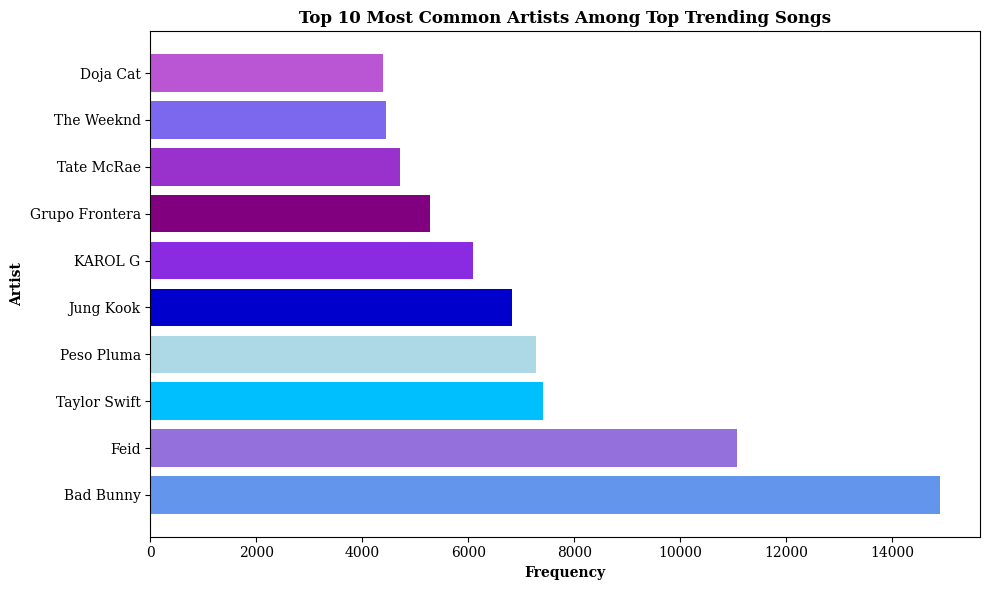

In [223]:
import matplotlib.pyplot as plt

colors = ['cornflowerblue', 'mediumpurple', 'deepskyblue', 'lightblue', 'mediumblue', 'blueviolet', 'purple', 'darkorchid', 'mediumslateblue', 'mediumorchid']

top_artists = artist_counts.head(10)

plt.figure(figsize=(10, 6))
plt.barh(list(top_artists.index), list(top_artists.values), color=colors)
plt.title('Top 10 Most Common Artists Among Top Trending Songs', fontweight='bold')
plt.xlabel('Frequency', fontweight='bold')
plt.ylabel('Artist', fontweight='bold')
plt.tight_layout()
plt.show()

It's important to mention that by giving a new artist or album name that the model didn't see before, the features `artists rank` and `album name` will get the value 1.

###`snapshot_date`

In this analysis, we won't address the 'snapshot_date' data or time series issues. Therefore, we'll remove this column and eliminate duplicate Spotify IDs, retaining only the rows with the updated snapshot date. Regarding songs that initially held a top rating of k and later dropped to t where t<<k, it would be equitable to consider the most recent data point rather than employing methods like averaging, selecting the maximum, or choosing the minimum.




In [224]:
# Converting the 'snapshot_data column from object --> datetime
df['snapshot_date'] = pd.to_datetime(df['snapshot_date'])

# Create a mask to identify rows with the most updated snapshot_date for each spotify_id
mask= df['snapshot_date'] == df.groupby('spotify_id')['snapshot_date'].transform('max')
df= df[mask]
df= df.drop(columns='snapshot_date')

Now we have for each spotify_id (song) it's most updated row/s including it's popularity parametrs in each country.


###`country`

Mapping each country to it's continent.


In [225]:
# Getting all the countries names
print(f"The unique countries over the data are: \n {df['country'].unique()}")

The unique countries over the data are: 
 [nan 'ZA' 'VN' 'VE' 'UY' 'US' 'UA' 'TW' 'TR' 'TH' 'SV' 'SK' 'SG' 'SE' 'SA'
 'RO' 'PY' 'PT' 'PL' 'PK' 'PH' 'PE' 'PA' 'NZ' 'NO' 'NL' 'NI' 'NG' 'MY'
 'MX' 'MA' 'LV' 'LU' 'LT' 'KZ' 'KR' 'JP' 'IT' 'IS' 'IN' 'IL' 'IE' 'ID'
 'HU' 'HN' 'HK' 'GT' 'GR' 'GB' 'FR' 'FI' 'ES' 'EG' 'EE' 'EC' 'DO' 'DK'
 'DE' 'CZ' 'CR' 'CO' 'CL' 'CH' 'CA' 'BY' 'BR' 'BO' 'BG' 'BE' 'AU' 'AT'
 'AR' 'AE']


In [226]:
# Mapping all the continents with its countries
continents = {
    'North America': ['US', 'MX', 'CA'],
    'Central America': ['CR', 'DO', 'GT', 'HN', 'NI', 'PA', 'SV'],
    'South America': ['AR', 'BO', 'BR', 'CO', 'CL', 'EC', 'PY', 'PE', 'UY', 'VE'],
    'Europe': ['AT', 'BE', 'BG', 'BY', 'CH', 'CZ', 'DE', 'DK', 'EE', 'ES', 'FI', 'FR', 'GB', 'GR', 'HU', 'IE', 'IS', 'IT', 'LT', 'LU', 'LV', 'NL', 'NO', 'PL', 'PT', 'RO', 'SE', 'SK', 'UA'],
    'Asia': ['AE', 'EG', 'HK', 'IL', 'IN', 'ID', 'JP', 'KR', 'KZ', 'MY', 'PH', 'PK', 'SA', 'SG', 'TH', 'TR', 'TW', 'VN'],
    'Africa': ['MA', 'NG', 'ZA'],
    'Oceania': ['AU', 'NZ'],
}

In [227]:
# Assignning each country to its continent
def assign_continent(country):
  if pd.isna(country):
        return 'Global'
  for continent, countries_in_continent in continents.items():
      if country in countries_in_continent:
          return continent
  return None

df['continent'] = df['country'].map(assign_continent)

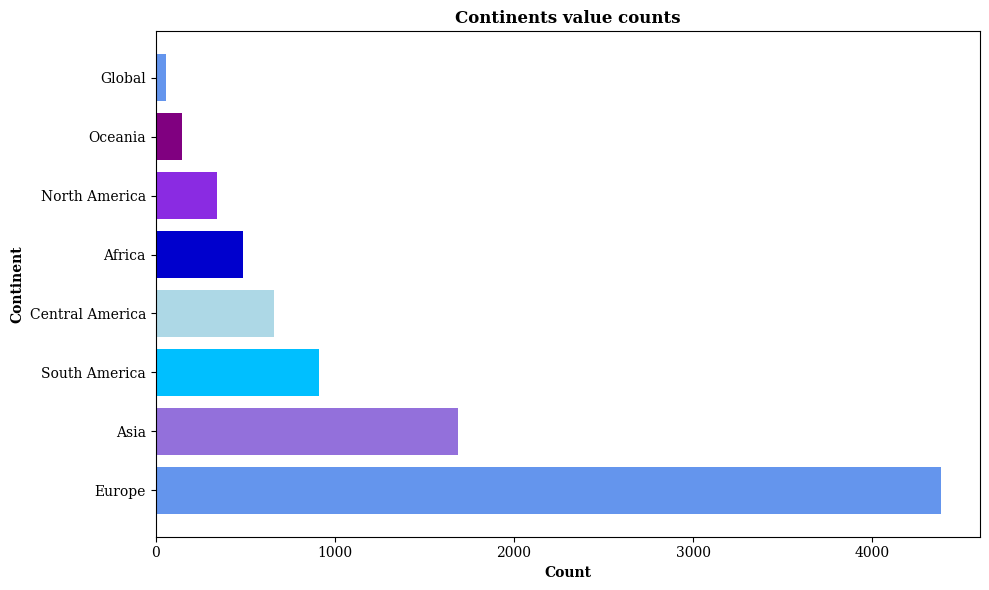

In [228]:
continent_values= df['continent'].value_counts()

colors = ['cornflowerblue', 'mediumpurple', 'deepskyblue', 'lightblue','mediumblue', 'blueviolet', 'purple']
plt.figure(figsize=(10, 6))
plt.barh(list(continent_values.index), list(continent_values.values), color=colors)
plt.title('Continents value counts', fontweight='bold')
plt.xlabel('Count', fontweight='bold')
plt.ylabel('Continent', fontweight='bold')
plt.tight_layout()
plt.show()

To address the question of a new song's potential success across continents, we require robust data featuring songs alongside their respective features and their success metrics within each continent. Therefore, we opted for **Europe** as our focal point due to its ample data availability. Additionally, the music genres prevalent in Europe align closely with our preferences, making it an ideal choice for our analysis.

In [229]:
# saving just the Europe continent rows
df = df[df['continent'] == 'Europe']
df= df.drop(['country','continent'], axis=1)

For each song, we've collected data represented by one or multiple rows with the same snapshot_date. We intend to streamline this information by grouping rows based on the spotify_id and merging them into a single row. This consolidation will involve computing the average values for `daily_rank`, `daily_movement`, `weekly_movement`, and `popularity`.

Our approach is rooted in the assumption that when a song, let's say S, is rated k in country C and additionally receives a rating of t in country U at the same timestamp, there's no compelling reason to prioritize either the minimum or maximum rating. Instead, we opt for an average approach, recognizing that neither penalizing nor favoring the song's performance in any particular country seems warranted.

In [230]:
agg_functions = {
    'daily_rank': 'mean',
    'daily_movement': 'mean',
    'weekly_movement': 'mean',
    'popularity': 'mean'
}

# Group by 'spotify_id' and apply aggregation functions
df= df.groupby('spotify_id').agg({**agg_functions, **{col: 'first' for col in df.columns if col not in agg_functions}})


The feature `spotify_id` from the dataset stems from its sole purpose as a unique identifier for each sample. Its presence offers no substantive value to the learning process, thus warranting its removal.

In [231]:
# The spotify_id and name columns are not effective for predicting popularity.
df= df.drop(columns=['spotify_id','name'])

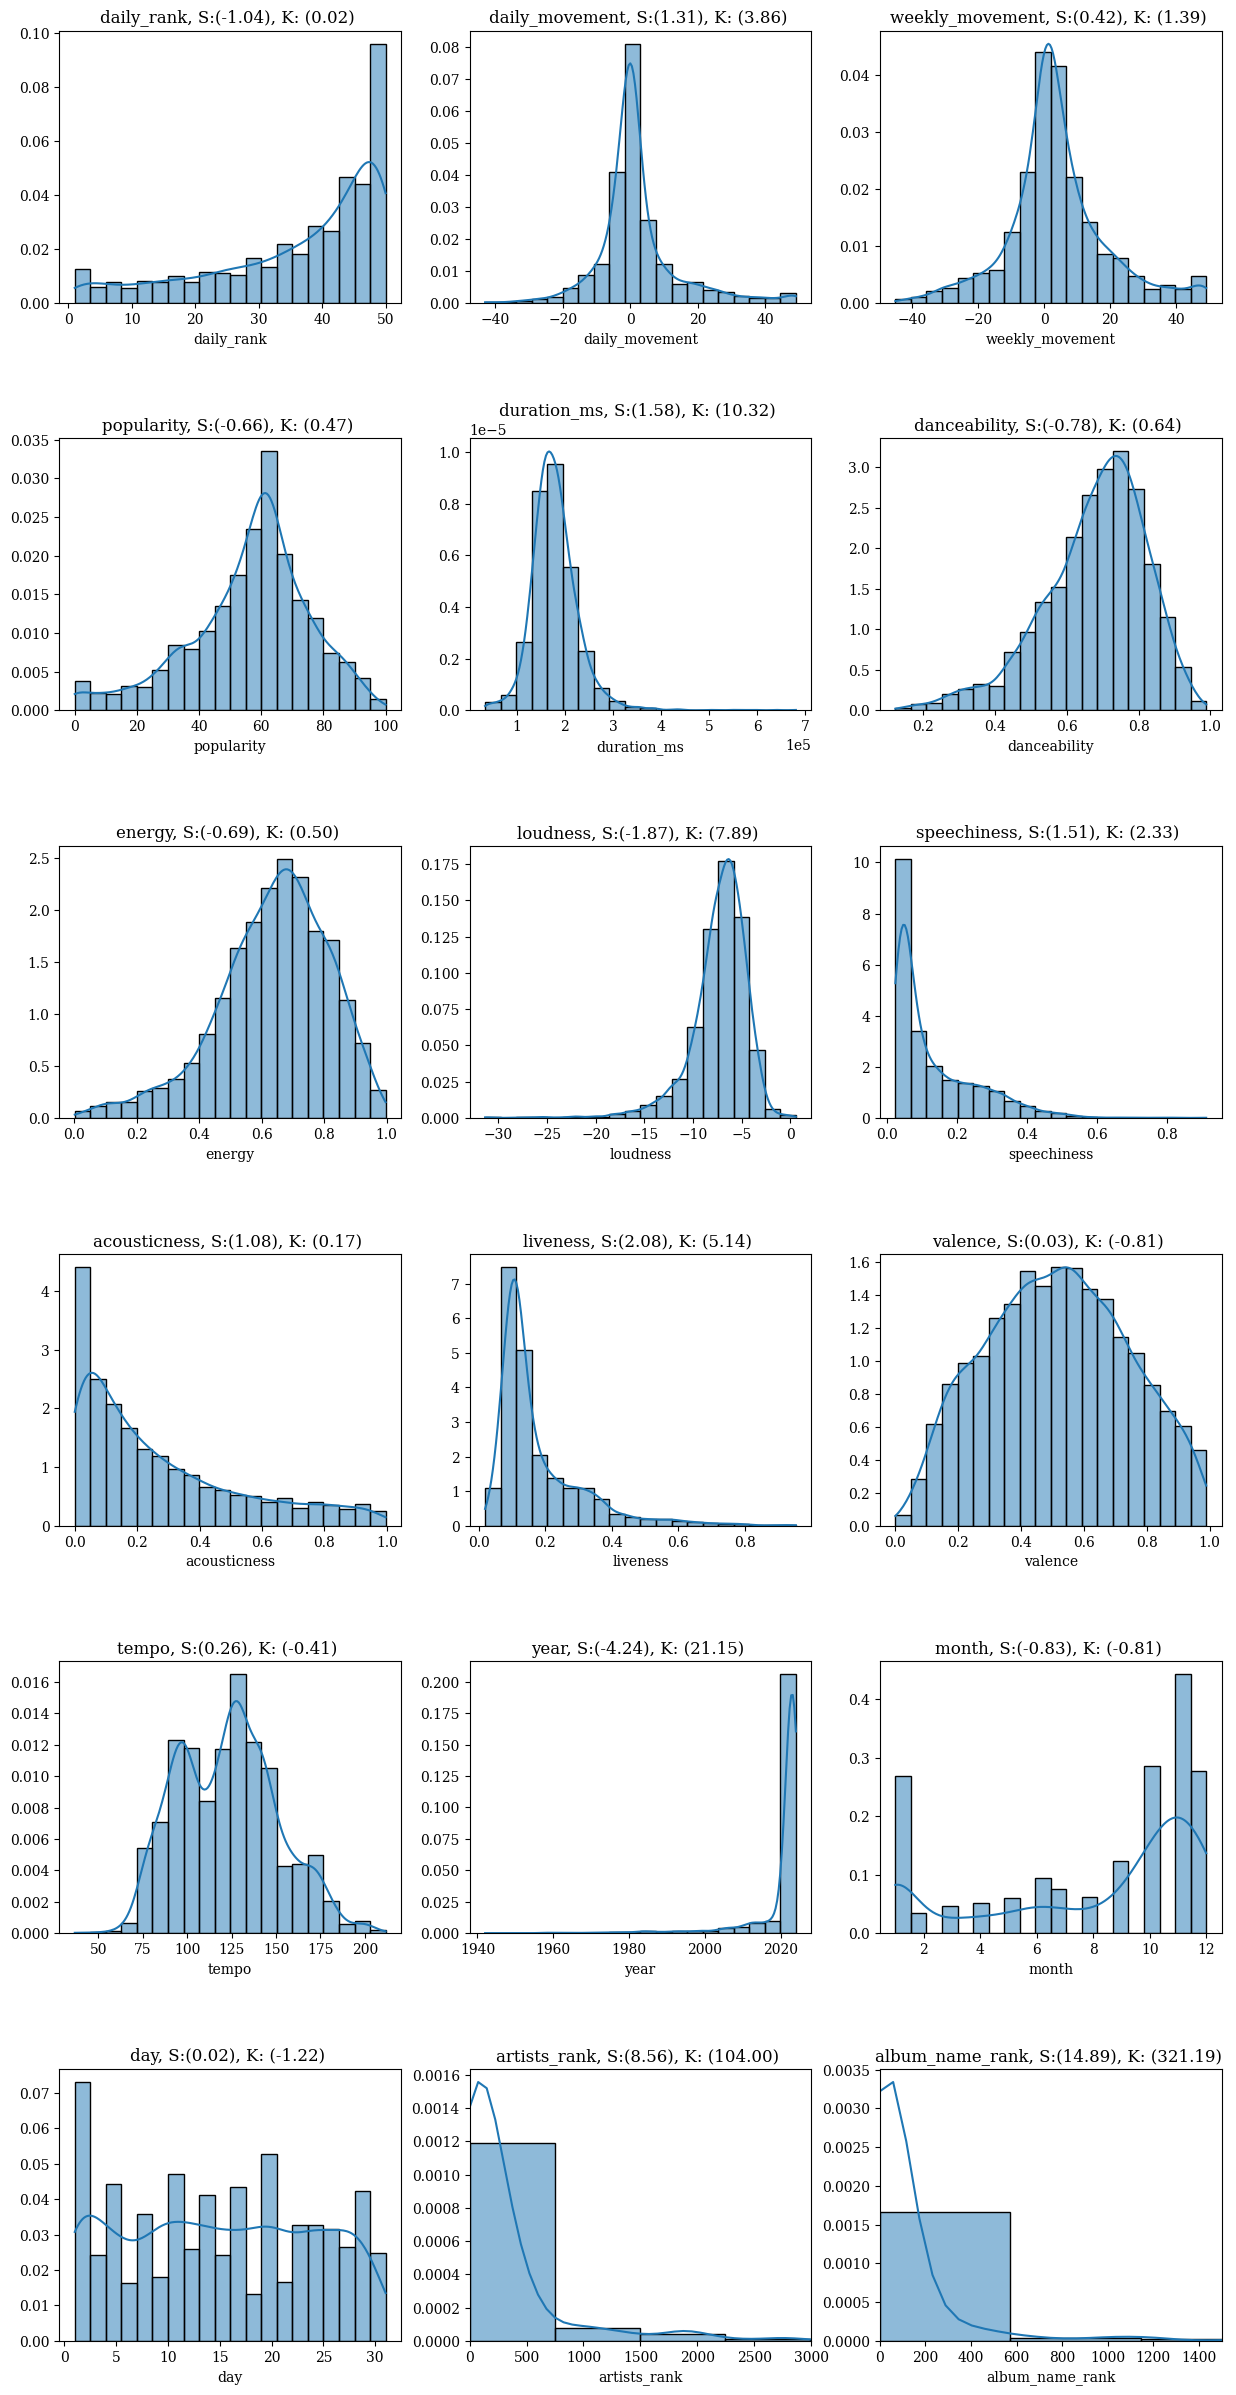

In [232]:
import seaborn as sns
from matplotlib.ticker import ScalarFormatter

plt.rcParams["font.family"] = "DejaVu Serif"
plt.rcParams["font.serif"] = ["Times New Roman"]
# Calculate skewness and kurtosis for each numerical column
skewness_values = df.skew()
kurtosis_values = df.kurt()

# Determine the numerical columns
numerical_columns= ['daily_rank', 'daily_movement', 'weekly_movement', 'popularity',
       'duration_ms', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'liveness',
       'valence', 'tempo', 'year', 'month', 'day',
       'artists_rank', 'album_name_rank']
# Determine the number of rows and columns for the subplots
n = len(numerical_columns)
cols = 3
rows = (n // cols) + (1 if n % cols != 0 else 0)

# Generate a figure grid
fig, axes = plt.subplots(rows, cols, figsize=(cols * 5, rows * 5))
fig.subplots_adjust(hspace=0.5)

# Fill the plots
for i, column in enumerate(numerical_columns):
    # Calculate the current place on the grid
    r = i // cols
    c = i % cols

    # Build the histograms
    ax = axes[r] if rows == 1 else axes[r, c]
    sns.histplot(df[column], ax=ax, kde=True, stat="density", bins=20, common_norm=False)
    ax.set_title(f"{column}, S:({skewness_values[column]:.2f}), K: ({kurtosis_values[column]:.2f}) ")
    ax.set_ylabel('')

    if column == 'duration_ms':
        ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))

    if column == 'artists_rank':
        ax.set_xlim(0, 3000)
    elif column == 'album_name_rank':
        ax.set_xlim(0, 1500)
    elif column == 'instrumentalness':
        ax.set_xlim(0, 1)

# Hide empty subplots if any
for i in range(n, rows * cols):
    if rows == 1:
        axes[i].axis('off')
    else:
        axes.flatten()[i].axis('off')

plt.show()


We analyzed selected features by conducted by calculating skewness, kurtosis, and presenting histograms with kernel density estimates (KDE). Notably, the `popularity` feature exhibits a negatively skewed distribution with a skewness of `-0.66` and a slightly leptokurtic shape with a kurtosis of `0.47`. The KDE plot for "Popularity" reveals a distribution with distinct peak that centered around `60`.    Additionally, the presence of a moderate level of exceptions suggests variability in the data. Conversely, the `valence` feature exhibits a skewness of `0.03`, signaling an almost perfectly symmetrical distribution. In addition, features like `loudness`, `daily_movement` and `duration_ms` display high kurtosis, indicative of more peaked distributions. The pronounced kurtosis in these features suggests a concentration of values around the central peak, highlighting the presence of distinctive patterns in their distributions.

### Outliers

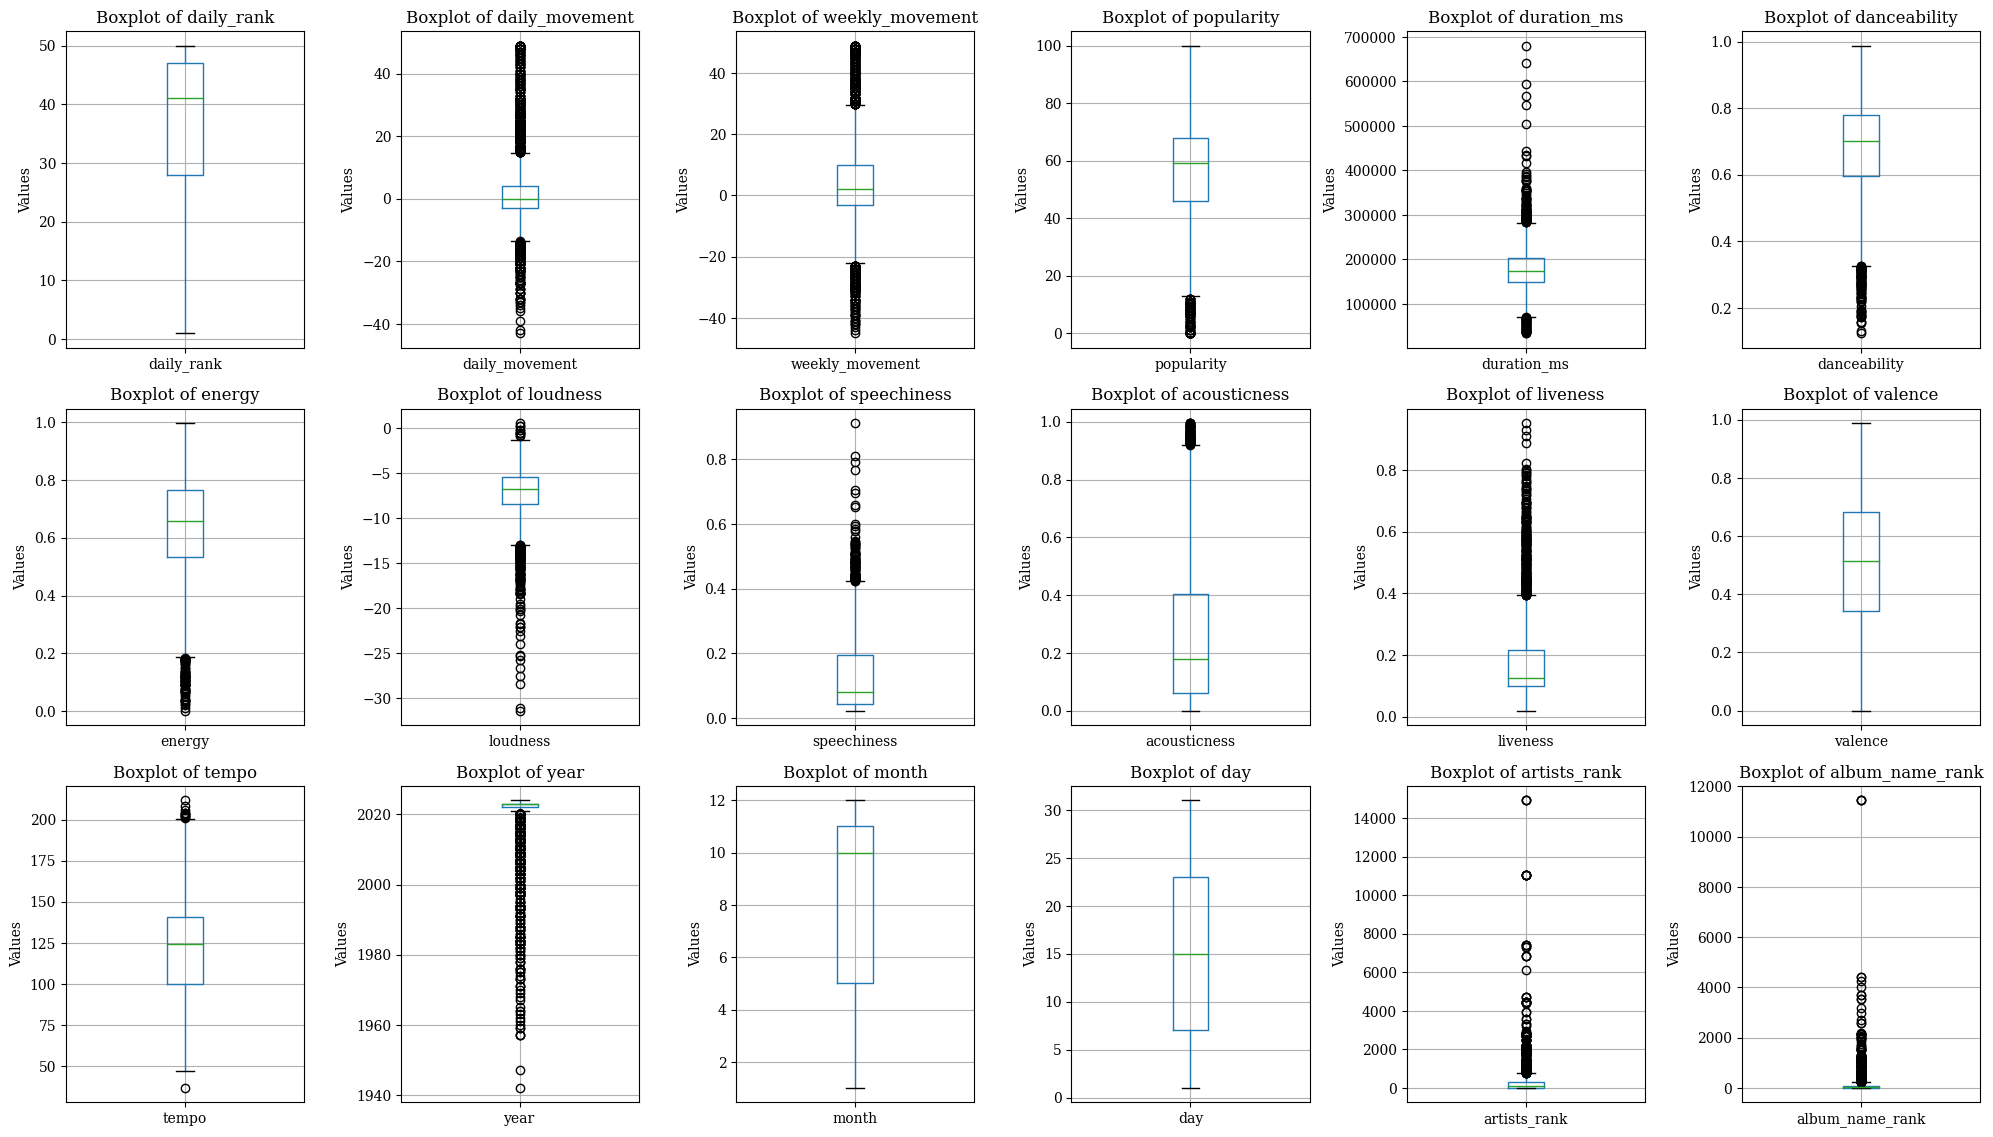

In [240]:
num_cols = len(df.columns)
num_rows = (num_cols + 5) // 6

plt.figure(figsize=(20, 15))

# We will refer only to the numerical values
num_col= ['daily_rank', 'daily_movement', 'weekly_movement', 'popularity',
        'duration_ms', 'danceability', 'energy',
       'loudness', 'speechiness', 'acousticness',
       'liveness', 'valence', 'tempo', 'year', 'month',
       'day', 'artists_rank', 'album_name_rank']

for idx, column in enumerate(num_col, start=1):
    plt.subplot(num_rows, 6, idx)
    df.boxplot(column=[column])
    plt.title('Boxplot of ' + column)
    plt.ylabel('Values')

plt.tight_layout()
plt.show()

In the following features, it's evident that there are exceptions -`duration_ms`, `liveness`, `loudness`,`speechiness`,`artists_rank`, `album_name_rank`,`year`, `liveness`.    
It's noteworthy that we chose not to handle exceptions, as comparative analysis revealed their negligible impact on results. Consequently, we saw no compelling reason to eliminate them from our dataset.

### `popularity`

We transformed our target attribute, `popularity`, into a binary form, distinguishing between less popular `0` and more popular `1` instances within the European context. This conversion was based on analyzing the distribution of the `popularity` feature.

By calculating the median position of the `popularity` feature, we gained a central point of reference. Instances below this average were categorized as less popular (assigned a label of 0), while those exceeding the average were deemed more popular (assigned a label of 1).

Adopting the average as the threshold for this binary classification provides a balanced approach, leveraging the statistical midpoint to effectively segment the data into two distinct categories. This method ensures a rational and unbiased categorization, rooted in the statistical characteristics of the dataset.

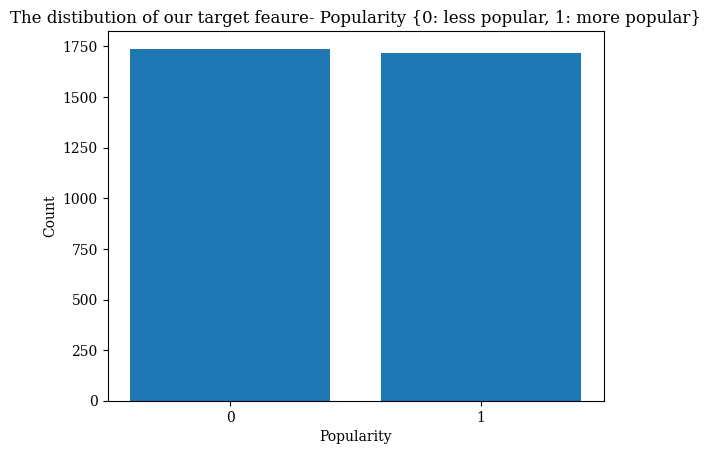

In [182]:
# Calculating the mean value of the popularity values ( Target Y ) in order to map each popularity to 1 if its above the mean and 0 otherwise.
median_value = df['popularity'].median()
# Binarize the column based on the median
binary_popularity = (df['popularity'] > median_value).astype(int)

popularity_counts= binary_popularity.value_counts()
popularity_table= popularity_counts.reset_index()
# Now each artists is recognize with its number of its popular songs over *all* the data
popularity_table.columns = ['popularity', 'popularity_counts']


# # Merge the original df with the artists_rank
df['popularity_binary'] = binary_popularity

# # Drop the column 'populairty' so we can change the
df= df.drop(columns= 'popularity')
plt.bar(popularity_table['popularity'], popularity_table['popularity_counts'])

plt.xlabel('Popularity')
plt.ylabel('Count')
plt.title('The distibution of our target feaure- Popularity {0: less popular, 1: more popular}')

plt.xticks([0, 1])

plt.show()


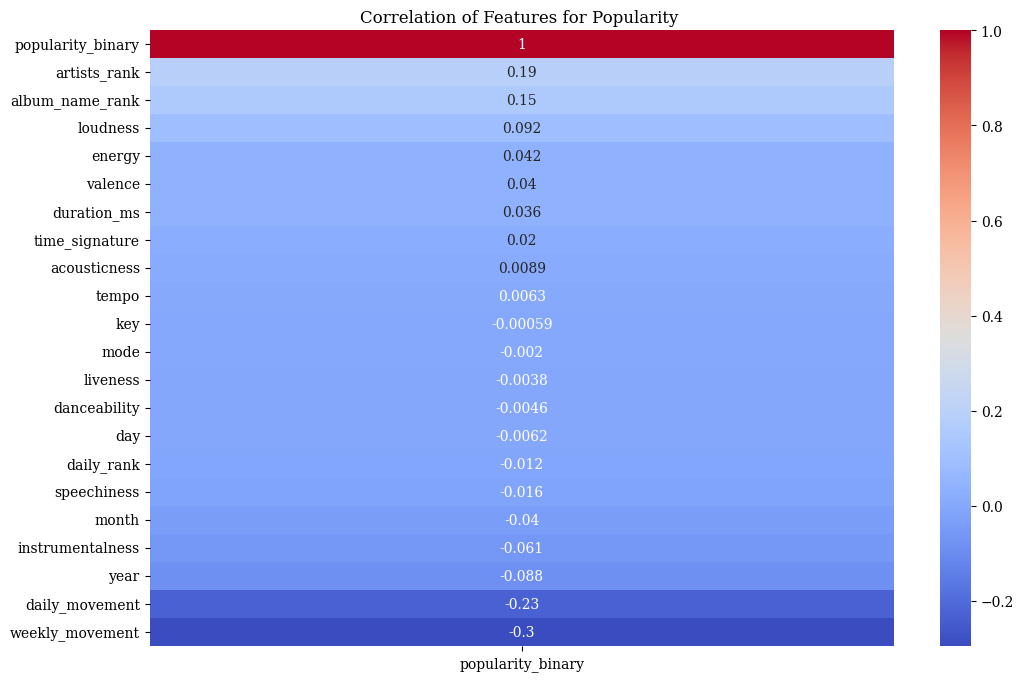

In [183]:
numeric_data = df.select_dtypes(include=['float64', 'int64', 'int32'])

# Correlation analysis to identify relationships with life expectancy
correlation_matrix = numeric_data.corr()

# Plotting the correlation matrix focusing on life expectancy
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix[['popularity_binary']].sort_values(by='popularity_binary', ascending=False), cmap='coolwarm', annot=True)
plt.title('Correlation of Features for Popularity ')
plt.show()

We can see that we a have the highest correlation between the `popularity` to `artists_rank` and `weekly_movement`.


## Feature Selection and Mutual Information

In the following [article:](https://proceedings.mlr.press/v198/rossi22a/rossi22a.pdf)

The authors claim that on average, there's only around a `4%` relative accuracy drop when `99%` of the features are missing. This suggests that a vast number of features may not be essential for achieving satisfactory performance.

And if we're being honest, we as humans, when we entered a room with people, it doesn't take too much time to form an opinion about any person in the room, which basically means we don't need to gather a lot of information about that person.

## Feature Selection Process

After exploring various combinations of features, we decided to focus on five specific ones that emerged as the most informative for our task:

- `artists_rank`
- `album_name_rank`
- `daily_movement`
- `weekly_movement`
- `month` (month of album release date)

These features were selected based on their significance in achieving our objectives.

## Mutual Information (MI) Calculation

To justify the selection of these features, we employed mutual information (MI) calculations. MI measures the amount of information obtained about one variable through the other variable.

### Methodology

We adopted a binary classification approach, where items are classified as belonging to a certain category or not. For example, in the case of document classification, we aim to determine whether a document is about economics or not.

We defined two binary variables:

- \( C \): Indicates whether an example belongs to the category (1 for inclusion, 0 for exclusion).
- \( F \): Denotes whether a specific feature is present in the example (1 for presence, 0 for absence).

### Mutual Information Formula

The mutual information \( MI \) between \( C \) and \( F \) is computed using the formula:

$$
MI = MI(C, F) = \sum_{c=0}^{1} \sum_{f=0}^{1} p(C = c, F = f) \log \left( \frac{p(C = c, F = f)}{p(C = c)p(F = f)} \right)
$$




In practice, we selected the top \( k \) features with the highest mutual information values concerning the category. This rigorous approach ensured that our chosen features were the most informative for our classification task.



In [202]:
from sklearn.feature_selection import mutual_info_classif

target_variable = 'popularity_binary'
features =df.drop(columns=[target_variable]).columns

X = df[features]
y = df[target_variable]

# Compute mutual information between each feature and the target variable
mutual_info = mutual_info_classif(X, y)

feature_mi = pd.DataFrame({'Feature': features, 'Mutual_Information': mutual_info})

# Sorting the features by their mutual information scores in descending order
feature_mi_sorted = feature_mi.sort_values(by='Mutual_Information', ascending=False)

# Select the top k (6) features with the highest mutual information
k = 6
top_k_features = feature_mi_sorted.head(k)

# Display the top k features
print("Top", k, "features with highest mutual information:")
print(top_k_features)

Top 6 features with highest mutual information:
            Feature  Mutual_Information
20     artists_rank            0.168878
21  album_name_rank            0.132749
2   weekly_movement            0.091412
1    daily_movement            0.077689
18            month            0.032598
17             year            0.031434


In [186]:
# assign 'popularity_binary' to be our label and dropping it from the df
Y= df['popularity_binary']
X= df.drop('popularity_binary', axis=1)
Y.shape, X.shape

((3457,), (3457, 22))

#Model

###ML pipeline- XGBoost

In [187]:
# import libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import accuracy_score , confusion_matrix, roc_curve, auc,  precision_score, recall_score, f1_score
import shap
import xgboost as xgb
import numpy as np

In [188]:
def classic_xgboost(X,Y):
  # Train-test split
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

  # Initialize XGBoost classifier
  model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, reg_alpha=1,
                            reg_lambda=1, max_depth=3, n_estimators=100)

  model.fit(X_train, y_train)
  y_test_pred =model.predict(X_test)

  auc_score_test = accuracy_score(y_test, y_test_pred)
  print(f"Accuracy on test without cross-validation: {auc_score_test}")

In [189]:
def xgboost_cross(X,Y):
  accuracy_scores = []
  precision_scores = []
  recall_scores = []
  f1_scores = []
  conf_matrices = []

  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

  # Initialize XGBoost classifier
  model = xgb.XGBClassifier(objective='binary:logistic', use_label_encoder=False, reg_alpha=1,
                            reg_lambda=1, max_depth=3, n_estimators=100)

  # Cross-validation
  cv = StratifiedKFold(n_splits=10, shuffle=True)
  # Perform cross-validation
  for train_index, val_index in cv.split(X_train, y_train):
      X_train_cross, X_val_cross = X_train.iloc[train_index], X_train.iloc[val_index]
      y_train_cross, y_val_cross = y_train.iloc[train_index], y_train.iloc[val_index]

      model.fit(X_train_cross, y_train_cross)

      y_val_pred = model.predict(X_val_cross)

      accuracy_scores.append(accuracy_score(y_val_cross, y_val_pred))
      precision_scores.append(precision_score(y_val_cross, y_val_pred))
      recall_scores.append(recall_score(y_val_cross, y_val_pred))
      f1_scores.append(f1_score(y_val_cross, y_val_pred))


  mean_accuracy = np.mean(accuracy_scores)
  mean_precision = np.mean(precision_scores)
  mean_recall = np.mean(recall_scores)
  mean_f1 = np.mean(f1_scores)

  print("Results on cross-validation:")
  print("Mean Accuracy:", mean_accuracy)
  print("Mean Precision:", mean_precision)
  print("Mean Recall:", mean_recall)
  print("Mean F1-score:", mean_f1)

  y_test_pred =model.predict(X_test)

  auc_score_test = accuracy_score(y_test, y_test_pred)
  print(f"Accuracy on test with cross-validation: {auc_score_test}")

  conf_matrix = confusion_matrix(y_test, y_test_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title('Confusion Matrix')
  plt.show()

  return model

#### Performing xgboost

Accuracy on test without cross-validation: 0.7760115606936416
Results on cross-validation:
Mean Accuracy: 0.761297284570711
Mean Precision: 0.7614338612788337
Mean Recall: 0.7711305241521069
Mean F1-score: 0.7657335416736
Accuracy on test with cross-validation: 0.7326589595375722


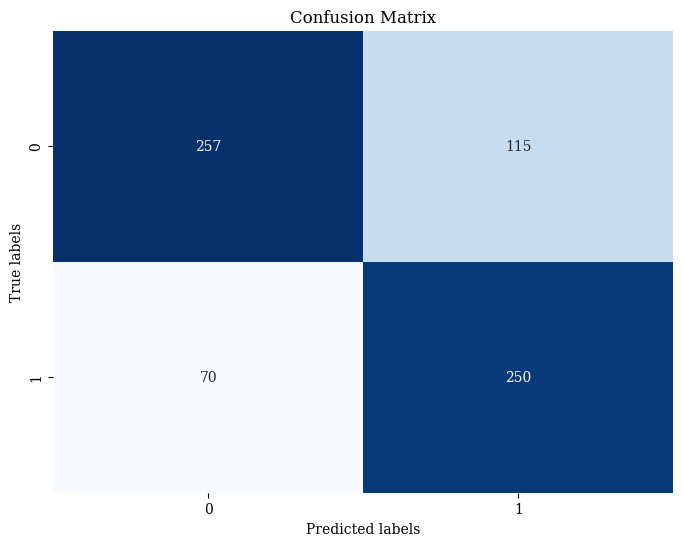

In [190]:
classic_xgboost(X,Y)
model = xgboost_cross(X,Y)

Cross-validation provides a more robust estimate of a model's performance compared to a single train-test split. By repeating the train-test split multiple times and averaging the results, cross-validation reduces the variance in performance estimation and provides a more reliable assessment of how well the model generalizes to unseen data

### ML pipline- light GBM

In [191]:
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import accuracy_score, roc_auc_score
import lightgbm as lgb


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Initialize LightGBM classifier
model = lgb.LGBMClassifier(objective='binary', metric='binary_logloss', num_leaves=31, learning_rate=0.05, feature_fraction=0.9)

# Initialize StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=10, shuffle=True)


# Perform cross-validation
for train_index, test_index in cv.split(X_train, y_train):
    X_train_cross, X_test_cross = X_train.iloc[train_index], X_train.iloc[test_index]
    y_train_cross, y_test_cross = y_train.iloc[train_index], y_train.iloc[test_index]

    # Train the LightGBM model
    model.fit(X_train_cross, y_train_cross)


# Make predictions on the test set
y_test_pred = model.predict(X_test)

# Calculate accuracy on the test set
accuracy_test = accuracy_score(y_test, y_test_pred)
print(f"Accuracy on Test Set: {accuracy_test * 100:.2f}")

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Info] Number of positive: 1259, number of negative: 1229
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001093 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3433
[LightGBM] [Info] Number of data points in the train set: 2488, number of used features: 22
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.506029 -> initscore=0.024117
[LightGBM] [Info] Start training from score 0.024117
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Inf

The XGBoost model outperformed LightGBM, leading to adjustments in its parameters for optimization.

To optimize parameters for the XGBoost model using Optuna, we refer to the following link: [Hyper-parameter Optimization with Optuna for XGBoost](https://medium.com/@mlxl/knime-xgboost-and-optuna-for-hyper-parameter-optimization-dcf0efdc8ddf).

The parameters found in the XGBoost model and their explanations are as follows:

- `max_depth`: Defines the maximum depth of a tree. It controls the complexity of the model by limiting the number of nodes in each tree.
- `learning_rate`: Controls the step size at each iteration while moving towards the minimum of the loss function. Lower values make the model more robust but require more iterations.
- `n_estimators`: Specifies the number of boosting rounds (trees) to be built. More trees can improve performance but also increase training time.
- `min_child_weight`: Specifies the minimum sum of instance weight (hessian) needed in a child. Higher values lead to more conservative models.
- `gamma`: Defines the minimum loss reduction required to make a further partition on a leaf node of the tree. Higher values result in fewer splits.
- `subsample`: Denotes the fraction of observations to be randomly sampled for each tree. Lower values prevent overfitting but may lead to underfitting.
- `colsample_bytree`: Specifies the fraction of features to be randomly sampled for each tree. Lower values reduce overfitting by introducing randomness into the model.
- `reg_alpha`: L1 regularization term on weights. Encourages sparsity in the feature matrix.
- `reg_lambda`: L2 regularization term on weights. Helps prevent overfitting by penalizing large weights.
- `eval_metric`: Evaluation metric used to monitor model performance during training. Here, 'mlogloss' is used for multi-class classification.
- `use_label_encoder`: Specifies whether to use the label encoder for categorical features. Here, it's set to False to avoid potential issues.



###Hyper paramaters- xgboost

In [193]:
import optuna

def xgboost_optuna(X,Y):
  X_train_temp, X_test, y_train_temp, y_test = train_test_split(X, Y, test_size=0.2)

  def objective(trial):

      params = {
          'max_depth': trial.suggest_int('max_depth', 1, 9),
          'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
          'n_estimators': trial.suggest_int('n_estimators', 50, 500),
          'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
          'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
          'subsample': trial.suggest_loguniform('subsample', 0.01, 1.0),
          'colsample_bytree': trial.suggest_loguniform('colsample_bytree', 0.01, 1.0),
          'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-8, 1.0),
          'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-8, 1.0),
          'eval_metric': 'mlogloss',
          'use_label_encoder': False
      }

      accs = []
      for i in range(10):
        X_train, X_val, y_train, y_val = train_test_split(X_train_temp, y_train_temp, test_size=0.25, random_state=i)

        optuna_model = xgb.XGBClassifier(**params)
        optuna_model.fit(X_train, y_train)

        y_pred = optuna_model.predict(X_val)

        accuracy = accuracy_score(y_val, y_pred)

        accs.append(accuracy)

        # Report intermediate result to Optuna
        trial.report(accuracy, i)

        # Handle pruning based on the intermediate value.
        if trial.should_prune():
          raise optuna.TrialPruned()

      mean_acc = np.mean(accs)

      return mean_acc

  study = optuna.create_study(direction='maximize')
  study.optimize(objective, n_trials=20)

  trials_df = study.trials_dataframe()
  best_scores = trials_df['value'].cummax()

  plt.figure(figsize=(6, 3))
  plt.plot(best_scores, marker='o', color='b', linestyle='-')
  plt.title('Optimization History')
  plt.xlabel('Iteration')
  plt.ylabel('Best Accuracy')
  plt.grid(True)
  plt.show()

  print('Number of finished trials: {}'.format(len(study.trials)))
  print('Best trial:')
  trial = study.best_trial

  print('  Value: {}'.format(trial.value))
  print('  Params: ')

  for key, value in trial.params.items():
      print('    {}: {}'.format(key, value))

  params = trial.params
  model = xgb.XGBClassifier(**params)

  model.fit(X_train_temp, y_train_temp)
  y_pred = model.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  conf_matrix = confusion_matrix(y_test, y_pred)

  print("Accuracy after tuning:", accuracy)
  print("Confusion Matrix after tuning:")
  plt.figure(figsize=(8, 6))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
  plt.xlabel('Predicted labels')
  plt.ylabel('True labels')
  plt.title('Confusion Matrix')
  plt.show()

  return model, X_train_temp


####Performing xgboost with optuna

[I 2024-05-01 17:30:09,112] A new study created in memory with name: no-name-fc864963-e442-4b32-bac1-4a87bbd25c80
<ipython-input-193-fb69720d4b1a>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
<ipython-input-193-fb69720d4b1a>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
<ipython-input-193-fb69720d4b1a>:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.suggest_l

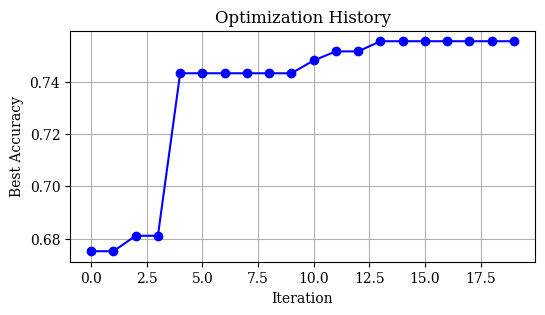

Number of finished trials: 20
Best trial:
  Value: 0.755635838150289
  Params: 
    max_depth: 3
    learning_rate: 0.1431161300041797
    n_estimators: 210
    min_child_weight: 6
    gamma: 1.0555865190183709e-06
    subsample: 0.86761484839061
    colsample_bytree: 0.4046222385968682
    reg_alpha: 0.0071235486220733646
    reg_lambda: 0.862811921307924
Accuracy after tuning: 0.7297687861271677
Confusion Matrix after tuning:


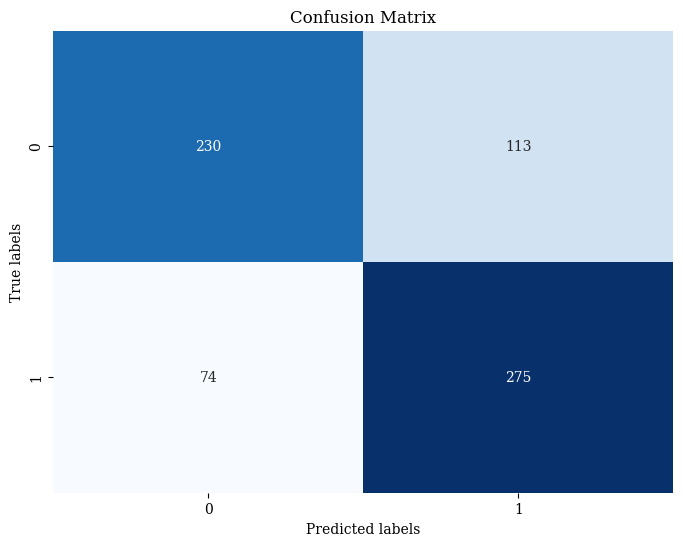

In [194]:
# Perorming xgboost with optuna with all the features
model_all_features_optuna, X_train_temp= xgboost_optuna(X,y)

### Feature importances

daily_rank: 0.04295538738369942
daily_movement: 0.09920105338096619
weekly_movement: 0.12541994452476501
is_explicit: 0.048147473484277725
duration_ms: 0.0350198857486248
danceability: 0.03158896416425705
energy: 0.031280238181352615
key: 0.026541845872998238
loudness: 0.040828317403793335
mode: 0.030728932470083237
speechiness: 0.03044768236577511
acousticness: 0.0335284098982811
instrumentalness: 0.030932651832699776
liveness: 0.025659510865807533
valence: 0.03145603463053703
tempo: 0.03037974052131176
time_signature: 0.0
year: 0.057359665632247925
month: 0.07142958790063858
day: 0.03430726006627083
artists_rank: 0.08809434622526169
album_name_rank: 0.054693035781383514


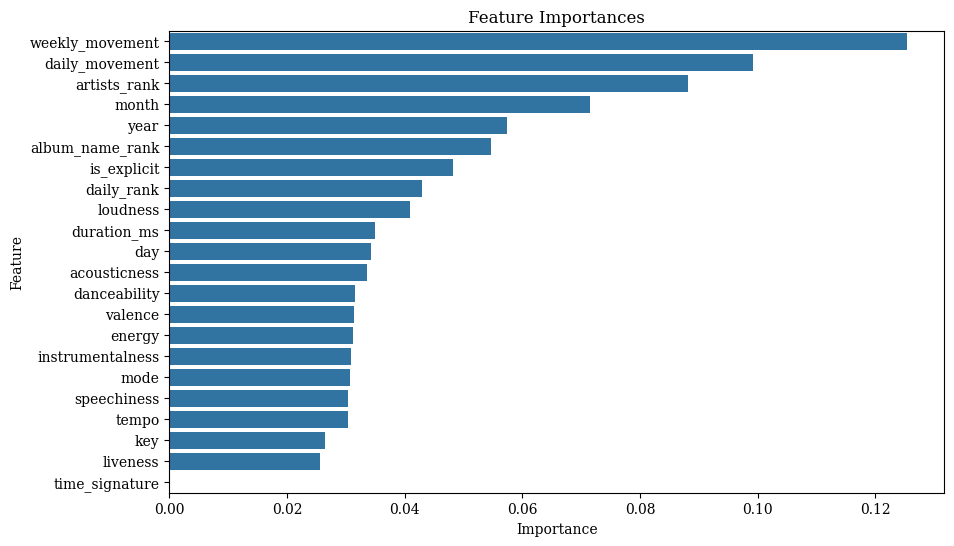

In [205]:
feature_importances = model_all_features_optuna.feature_importances_
for feature, importance in zip(X, list(feature_importances)):
  print(f'{feature}: {importance}')

feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

We can see that our 6 top features `weekly_movement` , `daily_movement`,  `artists_rank`, `album_name_rank`, `month` and `year` from the mutual infromation are also got high importances in the model.
In addition, we ran at the same time with this notebook all the possible combinations of the feaures, and we got that the combination we mentioned gets a good ACCURACY compared to running on all the features togehter as we did above.
There is a significant difference in the amount of features we can run the model with, 21 vs 6!!



### Performing xgboost with optuna on the 6 selected features

[I 2024-05-01 17:37:35,353] A new study created in memory with name: no-name-cb22ab04-4b49-4626-b61d-26ab0d6dffaf
<ipython-input-193-fb69720d4b1a>:10: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 1.0),
<ipython-input-193-fb69720d4b1a>:13: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'gamma': trial.suggest_loguniform('gamma', 1e-8, 1.0),
<ipython-input-193-fb69720d4b1a>:14: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'subsample': trial.suggest_l

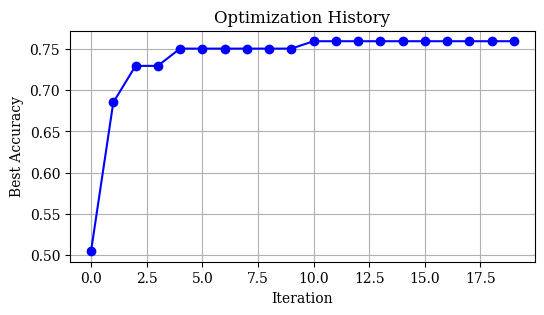

Number of finished trials: 20
Best trial:
  Value: 0.7593930635838151
  Params: 
    max_depth: 4
    learning_rate: 0.17888919814115908
    n_estimators: 284
    min_child_weight: 1
    gamma: 0.00020999853075651326
    subsample: 0.9540700736984993
    colsample_bytree: 0.900100882176556
    reg_alpha: 2.603772959933759e-05
    reg_lambda: 0.00017596917624255104
Accuracy after tuning: 0.7716763005780347
Confusion Matrix after tuning:


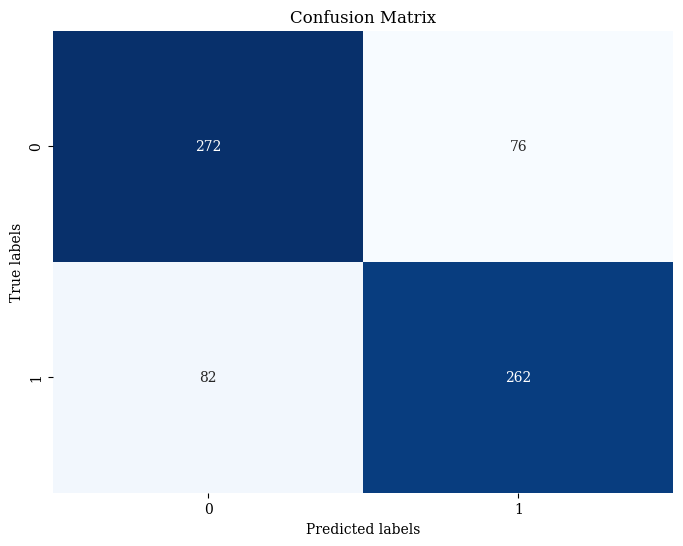

In [204]:
selected_features = ['weekly_movement', 'daily_movement', 'month', 'album_name_rank', 'artists_rank','year']
X_selected = X[selected_features]
model, X_train_temp= xgboost_optuna(X_selected,Y)

After re-running the XGBoost model with cross-validation and Optuna on the data with the 5 features, we observed an accuracy decrease of nearly 2.5%. It was achieved while reducing the dataset size by approximately 80%. This outcome strongly corroborates the findings presented in the article referenced at the outset of the notebook.


# Analyzing Model Performance with SHAP
After completing the preprocessing and optimization steps for our data and model, we're now ready to delve deeper into understanding how our model performs. To achieve this, we'll utilize SHAP (SHapley Additive exPlanations), a powerful technique for explaining individual predictions.

By employing SHAP, we aim to gain insights into the contribution of each feature to the model's predictions. This method allows us to assess the relative importance of different variables and understand how they impact the model's output, providing valuable insights for model interpretation and refinement.

In [197]:
! pip install shap

In [207]:
import shap
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_train_temp)

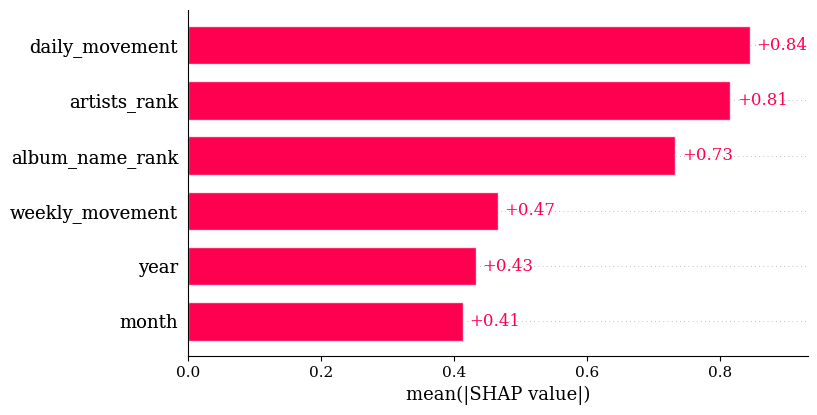

In [208]:
shap.plots.bar(explainer(X_train_temp))

The bar plot function generates a comprehensive feature importance visualization, showcasing the global significance of each feature. Here, the global importance of a feature is defined as the average absolute value of that feature across the entire sample. Features are arranged in descending order based on their impact on predictions. Notably, every feature demonstrates a positive contribution to our model, affirming the correctness of our feature selection and validating the Mutual Information (MI) and Feature Importance calculations obtained from running the XGBoost model on all features.

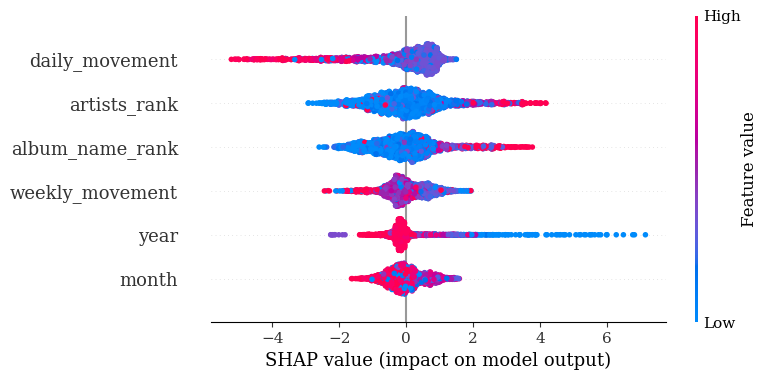

In [209]:
shap.summary_plot(shap_values, X_train_temp)

Y-axis indicates the feature names in order of importance from top to bottom.    
X-axis represents the SHAP value, which indicates the degree of change in log odds.     
The color of each point on the graph represents the value of the corresponding feature, with red indicating high values and blue indicating low values.      
Each point represents a row of data from the original dataset.     

The analysis reveals significant variability in the features daily_movement and year. Interestingly, high values of daily_movement exhibit a detrimental impact on predictions, while low values of year positively influence predictions. Notably, it's unexpected that year exhibits a greater influence than month, given the common intuition that shorter intervals, such as those spanning weeks, would exert a more pronounced effect compared to longer intervals.

#Summary

During our data analysis, we initially placed emphasis on attributes like energy and danceability, presuming they would strongly influence a song's popularity. However, our findings challenged this assumption. Instead, grappling with variables such as 'snapchat_date,' 'artists,' and 'album_name' presented the most intriguing challenge. It pushed us to think creatively and approach data analysis from a fresh perspective.

Upon receiving the feature importance plot, we were gratified to see that the features we engineered from this unconventional data played a pivotal role in prediction. This affirmed not only our ability to think innovatively but also our capacity to extract meaningful insights from existing data, enhancing predictive accuracy.

Looking ahead, we believe incorporating older songs into our dataset could enrich our predictive models. Our initial observations suggest that older songs significantly contribute to prediction accuracy, yet our dataset lacks an adequate representation of such songs.

For aspiring singers embarking on their journey, it's essential to recognize that timing and the volume of songs released can profoundly influence success. These factors should be carefully considered as part of their strategy for attaining broader recognition and achieving their goals.